Qui implemento lo stesso OU implementato nel codice principale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_trial = 100000

# Parameters for the simulation
T = 2 # time of sim in s
dt = 0.0005 # time step 
n = int(T/dt) # total time steps

t = np.linspace(0., T, n) # vector of times.

# Quantities for O-U precess
alpha = 1 # value from fig2 
sigma = 1 # value from fig2

mean_sim = np.zeros(n) # array for the mean
rho = np.zeros((n_trial,n)) # This also ensure to have the same starting point x0 = 0

for j in range(n_trial):
    # Quantities for O-U precess
    alpha = 1 # value from fig2 
    sigma = 1 # value from fig2
    # O-U
    for i in range(n - 1):
        rho[j][i + 1] = rho[j][i] - dt*alpha*rho[j][i] + np.sqrt(dt)*sigma*np.random.randn() 
    

     
# 
mean_sim = np.mean(rho, axis = 0) # mean along rows
#var_sim = np.var(rho, axis = 0) # var along rows, def as var = 1/n_trials Sum (x_i - x_mean)**2   

In [3]:
# Theoretical mean and variance
# mean

def OUmean(t, mu = 0, x0 = 0, alpha = 1):
    return x0*np.exp(-alpha*t) + mu*(1-np.exp(-alpha*t))

def OUvar(t, mu = 0, x0 = 0, alpha = 1, sigma = 1):
    return (sigma**2/(2*alpha))*(1 - np.exp(-2*alpha*t))

# For the parameters I have, for t-> inf
# Mean = 0, Var = 1/2

dt = 0.0005 
n trials= 100000
Biggest difference in mean: 0.0037853970772252273


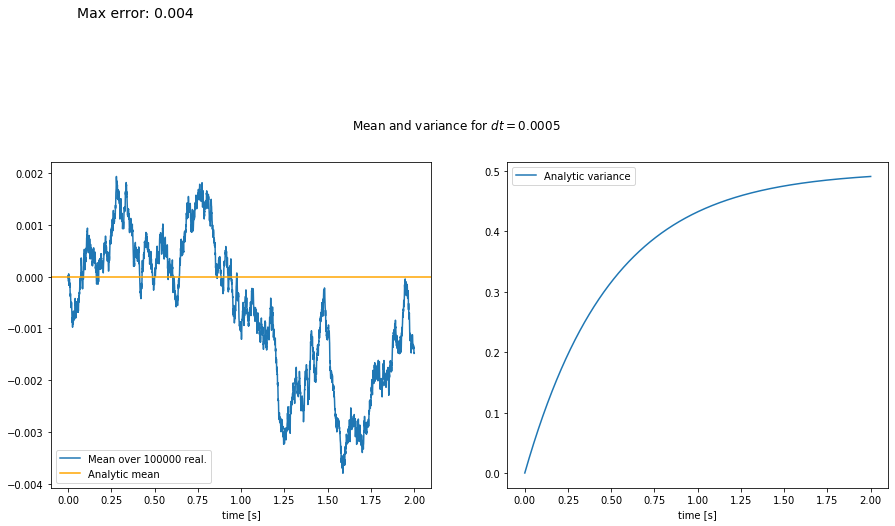

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))

ax[0].plot(t, mean_sim, label='Mean over {} real.'.format(n_trial))
ax[0].axhline(c='orange', label='Analytic mean')
ax[0].set_xlabel('time [s]')
ax[0].legend(loc='lower left')

#ax[1].plot(t, var_sim, label='Variance over {} real.'.format(n_trial))
v = list(map( OUvar, t ))
ax[1].plot(t, v, label='Analytic variance')
ax[1].set_xlabel('time [s]')
ax[1].legend()

fig.suptitle('Mean and variance for $dt=${}'.format(dt))

# Biggest difference
err_mean = np.max(abs(mean_sim))
#err_var = abs(np.max(abs(var_sim)-0.5))
print("dt =", dt, "\nn trials=", n_trial)
print("Biggest difference in mean:", err_mean)
#print("Biggest difference in var:", err_var)

ax[0].text(.05,0.005,'Max error: {:.3f}'.format(err_mean), fontsize=14)
#ax[1].text(2,.4,'Max error: {:.3f}'.format(err_var), fontsize=14)


plt.savefig('img_test/OU_test_{0}_trials_{1}'.format(dt,n_trial), format='pdf')

Test of the distribution

In [26]:
# Parameters for the simulation
T = 10000 # time of sim in s
dt = 0.001 # time step 
n = int(T/dt) # total time steps

t = np.linspace(0., T, n) # vector of times.

# Quantities for O-U precess
alpha = 1 # value from fig2 
sigma = 1 # value from fig2

mean_sim = np.zeros(n) # array for the mean
rho = np.zeros(n) # This also ensure to have the same starting point x0 = 0


# Quantities for O-U precess
alpha = 1 # value from fig2 
sigma = 1 # value from fig2
# O-U
for i in range(n - 1):
    rho[i + 1] = rho[i] - dt*alpha*rho[i] + np.sqrt(dt)*sigma*np.random.randn()

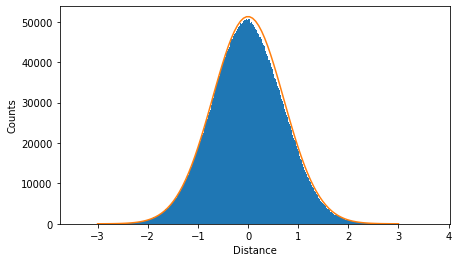

In [35]:
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(7,4))
n, _, _ = ax1.hist(rho, bins='auto')

# Analytic, for alpha = 1, sigma = 1 e x0 = 0
def solOU(x,A,t):
    return A*np.sqrt( 1/( np.pi*(1-np.exp(-2*t)) ) )*np.exp( - x**2/(1-np.exp(-2*t))  )
x = np.linspace(-3, 3, 100)
a = np.sum(n)/110
p = solOU(x,a,T)

ax1.plot(x,p)

ax1.set_xlabel('Distance')
ax1.set_ylabel('Counts')
plt.savefig('img_test/T_{0}_dt_{1}'.format(T,dt), format='pdf')